# 项目简介
（1）掌握ECWMF-ERA5数据的下载方法

（2）掌握numpy简单数据处理方法（时间平均、开尔文温度-摄氏温度转换）

（3）根据要求进行绘图，并考虑一定的美观性

# 配套视频链接：

## 1.导入需要的库&函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter

C:\ProgramData\Anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


## 2.读取nc文件，提取并处理数据

### 数据来源
ECWMF-ERA5再分析数据（single-levels）
https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview

### 文件信息
变量：2m温度场
区域范围：20N-40N，110E-130E，空间分辨率0.25°×0.25°
时间范围：2021年9月1日，0点-23点，时间分辨率1h

### 绘图要求
绘制该区域2021年9月1日平均2m气温空间分布，要求单位为摄氏温度

In [8]:
#读取文件
f1 = xr.open_dataset('C:/Users/LULU/Desktop/air2m20210901.nc')

#文件信息
print(f1)
#print(f1['t2m'])

<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 81, time: 24)
Coordinates:
  * longitude  (longitude) float32 110.0 110.2 110.5 110.8 ... 129.5 129.8 130.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2021-09-01 ... 2021-09-01T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-08-08 16:13:20 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


In [9]:
#提取数据
lat = f1['latitude'].data
lon = f1['longitude'].data
t2m = f1['t2m'].data

#对时间维度作平均
t2m_mean = np.mean(t2m,axis=0)

#开尔文温度转换成摄氏温度
t2m_mean = t2m_mean-273.15

#画图网格
X,Y = np.meshgrid(lon,lat)

## 3.画图

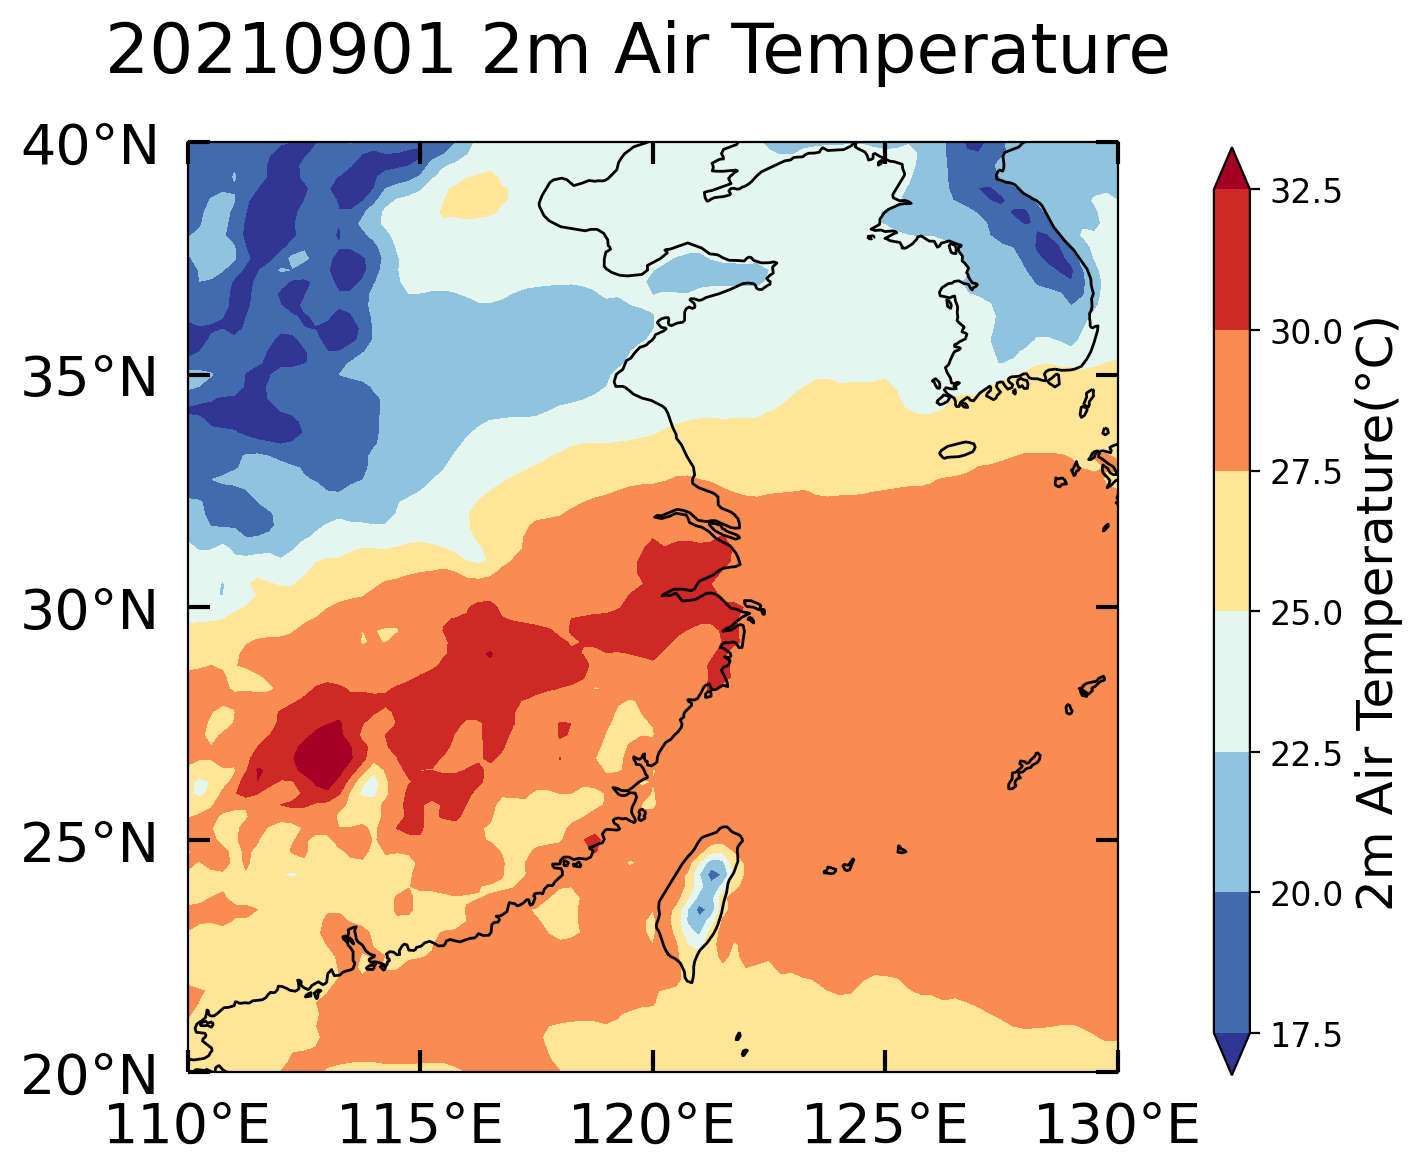

In [11]:
#figure和ax设置
fig = plt.figure(figsize=(6,8),dpi=200)
proj = ccrs.PlateCarree()
region=[110,130,20,40]
ax = plt.axes(projection=proj)
ax.set_extent(region,crs = proj)  #设置区域与需要画图的区域范围一致
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))  #海岸线

#contourf等高线填色图
con1 = ax.contourf(X,Y,t2m_mean,cmap='RdYlBu_r',extend='both')

#刻度设置
ax.set_xticks([110,115,120,125,130])  #指定要显示的经纬度
ax.set_yticks([20,25,30,35,40])
ax.xaxis.set_major_formatter(LongitudeFormatter())  #刻度格式转换为经纬度样式
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.tick_params(axis='x',top=True,which='major',direction='in',length=8,width=1.5,labelsize=20,pad=10)  #刻度样式
ax.tick_params(axis='y',right=True,which='major',direction='in',length=8,width=1.5,labelsize=20,pad=10)

#colorbar颜色条
l,b,w,h = 0.98, 0.21, 0.03, 0.58
rect = [l,b,w,h]
cbar_ax = fig.add_axes(rect)
cb = fig.colorbar(con1, cax = cbar_ax,orientation='vertical',spacing='proportional')
cb.set_label('2m Air Temperature(°C)',fontsize=18)
cb.ax.tick_params(labelsize=12)

#标题
plt.suptitle('20210901 2m Air Temperature',fontsize=25,y=0.87)
plt.savefig('C:/Users/LULU/Desktop/t_20210901.jpg',bbox_inches = 'tight')
plt.show()